# Курс по машинному обучению,   ВМК МГУ
# KNN: Классификация и регрессия

### Важно! О формате сдачи

* **Задания из ноутбука, за исключением двух заданий на реализацию кода, оцениваются по системе <font color='red'>кросс-рецензирования</font>.**
* **При решении ноутбука используйте данный шаблон. Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий. Добавлять свои ячейки, при необходимости, конечно можно**
* **Везде, где в формулровке задания есть какой-либо вопрос (или просьба вывода), необходимо прописать ответ в ячейку (код или markdown).**
* **Наличие кода решения обязательно. Письменные ответы на вопросы без сопутствующего кода оцениваются в 0 баллов.**

А также..

Если в ячейке написана фраза "Вывод"/"Ответ на вопрос" итд, то ожидается ответ в виде текста (можете добавить ячейки с кодом, если считаете это необходимым, но это необязательно). Если в ячейке написано "Your code here", то ожидается ответ в виде кода (можете добавить ячейки с кодом, если считаете это необходимым, но это необязательно). Если есть и ячейка с фразой "Вывод", и ячейка с фразой "Your code here", то в ответе ожидается и код, и текст)

### *Примерное время выполнения всех ячеек ноутбука: 10 минут*

## Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать. 

После установки нужных версий нажмите на кнопку Restart runtime, которая появится в следующей ячейке после завершения ее выполнения.

После перезапуска (restart runtime) устанавливать библиотеки еще раз не нужно, достаточно проверить, что установилась их новая версия. 

На скачивание файла и установку понадобится не более 5 минут.

**Важно!** Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

**Важно!** Если вы предпочитаете делать практические задания на своем личном ноутбуке, то предлагаем вам завести виртуальное окружение и установить в нем библиотеки из файла requirements.txt по ссылке https://drive.google.com/file/d/1br9tHmdccGVzpk0svXNmHxVMh_OF2oZR/view?usp=sharing
В таком случае виртуальное окружение достаточно настроить всего один раз.



In [ ]:
# !!! Данный блок будет работать только в Google-Colab !!!
! gdown 1br9tHmdccGVzpk0svXNmHxVMh_OF2oZR
! pip install -r /content/requirements.txt

Нажмите на кнопку Restart runtime, которая появилась в  ячейке сверху после завершения ее выполнения.

После перезапуска (restart runtime) устанавливать библиотеки еще раз не нужно, достаточно проверить, что установилась их новая версия.

Проверим версию библиотеки:

In [272]:
import matplotlib
assert(matplotlib.__version__ == '3.5.3')

Теперь можно приступать к выполнению задания! :)

# Часть 0. Знакомство с библиотекой scikit-learn

Scikit-learn - это библиотека машинного обучения с открытым исходным кодом, которая предоставляет различные инструменты для предобработки данных и обучения моделей.

Каждый модуль предобработки данных имеет два метода: fit и transform. Как правило, метод fit принимает на вход **обучающую** выборку $X$ и считает по ней необходимые для заданного типа преобразования статистики. Метод transform преобразует входные данные, используя статистики, посчитанные при вызове метода fit и возвращает преобразованные данные. Выборка $X$ представляется в виде матрицы размера (n_samples, n_features), то есть каждому объекту соответсвует отдельная строка, а каждому признаку - отдельный столбец.

Каждая модель машинного обучения имеет два метода: fit - метод ответственный за обучения модели и predict - метод ответственный за предсказание целевой переменной. Как правило, метод fit принимает на вход два аргумента: $X$ - **обучающая** выборка, $y$ - значения целевых переменных на объектах обучающей выборки. Метод predict принимает на вход набор данных и выдает предсказанные значения целевых переменных на этом наборе данных. Если нами решается задача классификации, то вектор целевых переменных $y$ содержит целые числа (или другое множество дискретных величин). При решении задачи регрессии вектор $y$ содержит вещественные числа.

Более подробно про библиотеку можно прочитать в документации по [ссылке](https://scikit-learn.org/stable/index.html)

Приведем пример стандартной работы с библиотекой scikit-learn

In [273]:
#Создаем обучающую выборку
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]

#Делаем импорт класса K-NN классификатора
from sklearn.neighbors import KNeighborsClassifier

#Создаем объект класса 3-NN классификатора
neigh = KNeighborsClassifier(n_neighbors=3)

#Обучаем классифкатора на созданной ранее выборке
neigh.fit(X, y)

#Предсказываем метку класса нового объекта с помощью метода predict
print(neigh.predict([[1.1]]))

[0]


# Часть 1. Нормализация признакового пространства

В задачах машинного обучения важную роль играет нормализация данных. Для числовых признаков, как правило, используют два типа нормализации:

* Нормализация к распределению с нулевым матожиданием и единичной дисперсией $x := \frac{x - E(x)}{\sigma (x)}$, где матожидание $E(x)$ и стандартное отклонение $\sigma (x)$ считаются по каждому признаку (столбцу) отдельно
* Нормализация в отрезок [0, 1] $x := \frac{x - \min(x)}{\max(x) - \min(x)}$, где минимум и максимум берется по каждому признаку (столбцу) отдельно

Рассмотрим пример. Ниже приведены: таблца до нормализации признаков, таблица после нормализации к нулевому матожиданию и единичной дисперсии, таблица после нормализации в отрезок [0, 1]

До нормализации 

| Признак 1   | Признак 2   |
| ----------- | ----------- |
| 1           | 2           |
| 2           | -1          |
| 3           | 0           |

Нормализация к нулевому матожиданию и единичной дисперсии

| Признак 1   | Признак 2   |
| ----------- | ----------- |
| -1.225      | 1.336       |
| 0           | -1.069      |
| 1.225       | -0.267      |

Нормализация в отрезок [0, 1]

| Признак 1   | Признак 2   |
| ----------- | ----------- |
| 0           | 1           |
| 0.5         | 0           |
| 1           | 0.333       |

**Задание 1.1** (тесты, 5 баллов) В модуле scalers.py реализуйте два вида нормализации признакового пространства. StandardScaler - нормализация к распределению с нулевым матожиданием и единичной дисперсией, MinMaxScaler - нормализация в отрезок [0, 1].

Нормализаторы имеют два метода - метод fit и метод transform. Метод fit получает на вход **обучающую** выборку и считает по ней все необходимые для заданного преобразования статистики. Метод transform преобразует данные, используя статистистики, посчитанные при вызове метода fit.

**После того, как вы локально реализовали и протестировали модуль scalers.py, загрузите его в сессионное хранилище: нажмите знак папки слева, затем знак загрузки. Будьте внимательны, по окончании сессии хранилище очистится -- вам нужно будет заново загрузить соответствующие модули**

In [274]:
from scalers import StandardScaler, MinMaxScaler

In [275]:
import numpy as np
import seaborn as sns
import pickle

from matplotlib import pyplot as plt


plt.rcParams["figure.figsize"] = (5,5)

Загрузим файл с данными data.pkl:

In [ ]:
!gdown 1acbP4PNmu11rkBzozvIc3bowWaQL7iFe

Загрузим данные в память. В переменной $X$ будут храниться признаковые описания объектов, в переменной $y~-$ метки классов

In [277]:
with open('/content/data.pkl', 'rb') as file:
    X, y = pickle.load(file)

In [278]:
def plot_data_points(X, labels, xlim, ylim):
    g = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels)
    g.set(xlim=xlim, ylim=ylim)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()

Визуализируем наши данные

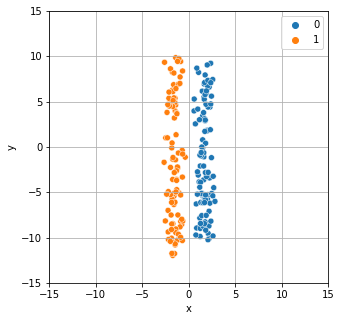

In [279]:
plot_data_points(X, y, xlim=(-15, 15), ylim=(-15, 15))

Как видно, наши данные идеально разделяются прямой $x=0$

Функция $plot\_knn\_bound$ принимает на вход объекты $X$, метки классов $y$, метод нормализации признаков $scaler$, число соседей $n\_neighbors$ и границы рисунка $xlim$, $ylim$. Функция обучает $KNN$ классификатор с числом соседей $n\_neighbors$ и визуализирует разделяющую поверхность для классов, полученную с помощью обученного $KNN$ классификатора.

* Если вы не можете различить _выбранные нами цвета_, то измените список цветов в переменных cmap_light и cmap_bold. Актуальный список возможных цветов находится [здесь](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

In [280]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

def plot_knn_bound(X, y, scaler=None, n_neighbors=10, xlim=(-15, 15), ylim=(-20, 20)):
    # step size in the mesh
    h = 0.05

    # Create color maps
    cmap_light = ListedColormap(['C0', 'orange', 'cyan', 'green'][:np.unique(y).shape[0]])
    cmap_bold = ['C0', 'orange', 'c', 'darkgreen'][:np.unique(y).shape[0]]

    x_min, x_max = xlim
    y_min, y_max = ylim
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    X_scaled = X # if scaler is None
    if scaler is not None:
        grid = scaler.transform(grid)
        X_scaled = scaler.transform(X)

    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, algorithm='brute')
    clf.fit(X_scaled, y)

    Z = clf.predict(grid)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y,
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Разделющие поверхности алгоритма {}-NN'.format(n_neighbors))
    plt.grid()
    plt.show()

Нарисуем разделющие поверхности $1$-$NN$ и $10$-$NN$

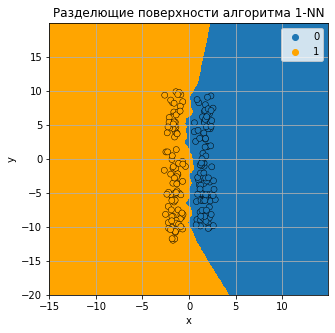

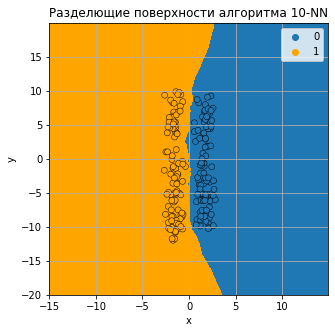

In [281]:
plot_knn_bound(X, y, n_neighbors=1)
plot_knn_bound(X, y, n_neighbors=10)

**Задание 1.2** (кросс, 2 балла) Чем отличаются поверхности, полученные при числе соседей 1 и 10? Объясните, чем вызваны данные отличия

При количестве соседей равном 10 граница болучилась более гладкой. Это связано с тем, что точки находятся довольно близко друг к другу, а границы классов не ровные. Из-за этого при k = 1 разделяющся проверхность проходит максимально далеко от границ обоих классов, а при k = 10 разделяющая поверхность иногда "прижимается" к границе одного из классов довольно близко.

**Задание 1.3** (кросс, 3 балла) Объясните, почему наблюдается сильное отклоенние разделяющей поверхности от прямой $x=0$ при значениях $y < -10$ и $y > 10$. Дайте строгое математическое обоснование наблюдаемого явления

Разделяющая поверхность отклоняется от прямой $x$ $=$ $0$ при $y$ $<$ $-10$ и $y$ $>$ $10$, так как класс $0$ меньше растянут вдоль оси $Oy$. При подсчете расстояния от нового объекта до данных объектов класса по формуле $\frac{1}{dist}$ в точках областей $x$ $∈$ $[0; 5]$, $y$ $\in$ $[10;$ $\infty$$]$ или $x$ $∈$ $[0; 5]$, $y$ $\in$ $[10;$ $-\infty$$]$ мы получим, что расстояние до класса $1$ меньше чем до класса $0$. Из-за этого разделяющая поверхность и проходит близко к диагонали этой области.

Данную проблему может решить нормализация признакового пространства. 

**Задание 1.4** (кросс, 1 балл) Начертите разделяющие поверхности для $KNN$, обученного на нормализованных признаках с помощью реализованных вами нормализаторов. Используйте функцию $plot\_knn\_bound$

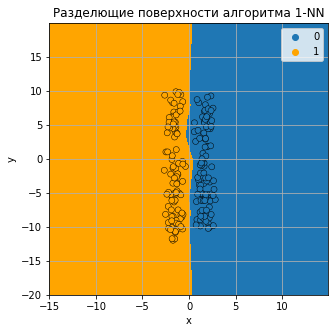

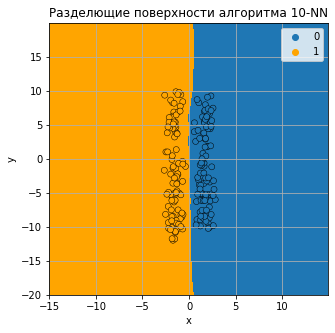

In [282]:
#ваш код
sc1 = MinMaxScaler()
sc1.fit(X)
plot_knn_bound(X, y, sc1, n_neighbors=1)
sc2 = MinMaxScaler()
sc2.fit(X)
plot_knn_bound(X, y, sc2, n_neighbors=10)

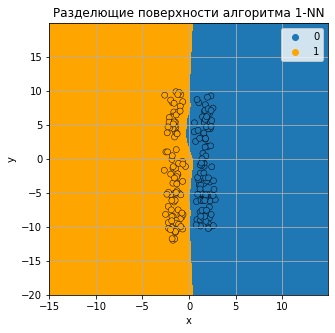

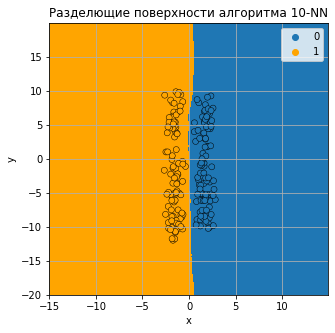

In [283]:
sc3 = StandardScaler()
sc3.fit(X)
plot_knn_bound(X, y, sc3, n_neighbors=1)
sc4 = StandardScaler()
sc4.fit(X)
plot_knn_bound(X, y, sc4, n_neighbors=10)

**Задание 1.5** (кросс, 4 балла) Пусть дано произвольное число точек на плоскости. Представим, что каждая точка - это отдельный класс. Пусть на данной выборке был обучен $1-NN$ классификатор. Чем с геометрической точки зрения являются разделяющие поверхности этого классификатора? Требуется математически строго, однозначно и с полным обоснованием определить геометрическое место точек разделяющих поверхностей.

В качестве примера ниже представлена визуализация для четырех точек

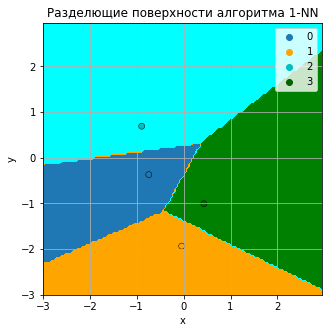

In [ ]:
X = np.random.randn(4, 2)
y = np.arange(4)
plot_knn_bound(X, y, n_neighbors=1, xlim=(-3, 3), ylim=(-3, 3))

**Разделяющие поверхности:**

Рассмотрим два объекта. Точки на разделяющей поверхности между двумя объектами обучающей выборки - это те точки, расстояние до которых, от обоих объектов одинаково. Следовательно, так как каждая точка, равноудаленная от концов отрезка, лежит на серединном перпендикуляре к нему, то разделяющая граница между двумя объектами обучающей выборки - это серединный перпендекуляр к отрезку, соединяющему эти объекты. Если эти прямые пересекаются и области накладываются друг на друга(например как прямые для зеленой и синей точек, для синей и желтой точек, и для зеленой и желтой точек), то выбирается одна из этих областей (и разделяющих поверхностей по близости ко всем трем точкам (в примере с зеленой, синей и желтой точками). 

Разделяющая поверхность трех объектов - это пересечение попарных серединных перпендекуляров, при этом точка пересечения равноудалена от всех трех объектов, те является центром окружности, проходящей через эти три объекта.
В данном случае выбирается граница между синей и желтой точками. Это проводится для каждой пары точек, в результате чего мы получаем то разбиение, которое представлено на графике.

Случай 4 объектов. Из 4-ех выбирается три, окружность, проходящая через которые, имеет минимальный радиус. В этой точке пересекаются попарные перпендекуляры этих трех объектов. Далее строится еще одна окружность минимального радиуса, но уже содержащая невыбранную до этого точку. В этой точке пересекаются еще два перпендекуляра. Разделяющей поверхности будут принадлежать те первые перпендекуляры, которые не пересеклись с последними, последние перпендекуляры и отрезки, отсеченные от первых перпендекуляров последними.

Таким образом и получается построенное разбиение.


# Часть 2. Кросс-валидация на задаче регрессии

При решении прикладных задач, как правило, доступна лишь обучающая выборка. Для того чтобы иметь возможность оценить качество модели на тестовой выборке, прибегают к методу, называемому кросс-валидация.   
Пусть зафиксирован некоторый набор параметров модели. В $KNN$ под параметрами могут пониматься число соседей, метрика близости $\rho$, стратегия выбора весов $w_i$. При кросс-валидации **обучающая** выборка делится на $n$ равных частей (folds). Затем обучаются $n$ моделей с заданными параметрами (у всех моделей параметры одинаковые и фиксированы) - $i$-ая модель обучается на всей обучающей выборке, кроме объектов, которые попали в $i$-ый фолд (out-of-fold). Затем измеряется качество $i$-ой модели на $i$-ом фолде. Так как он не участвовал в обучении этой модели, то полученная оценка качества модели будет являться корректной. Финальным значением метрики качества для модели с заданными параметрами является среднее полученных нами значений на $n$ фолдах.



*Подумайте, как в описанную выше схему корректно добавить обучение нормализаторов*



Принцип работы кросс-валидации схематично изображен на рисунке.

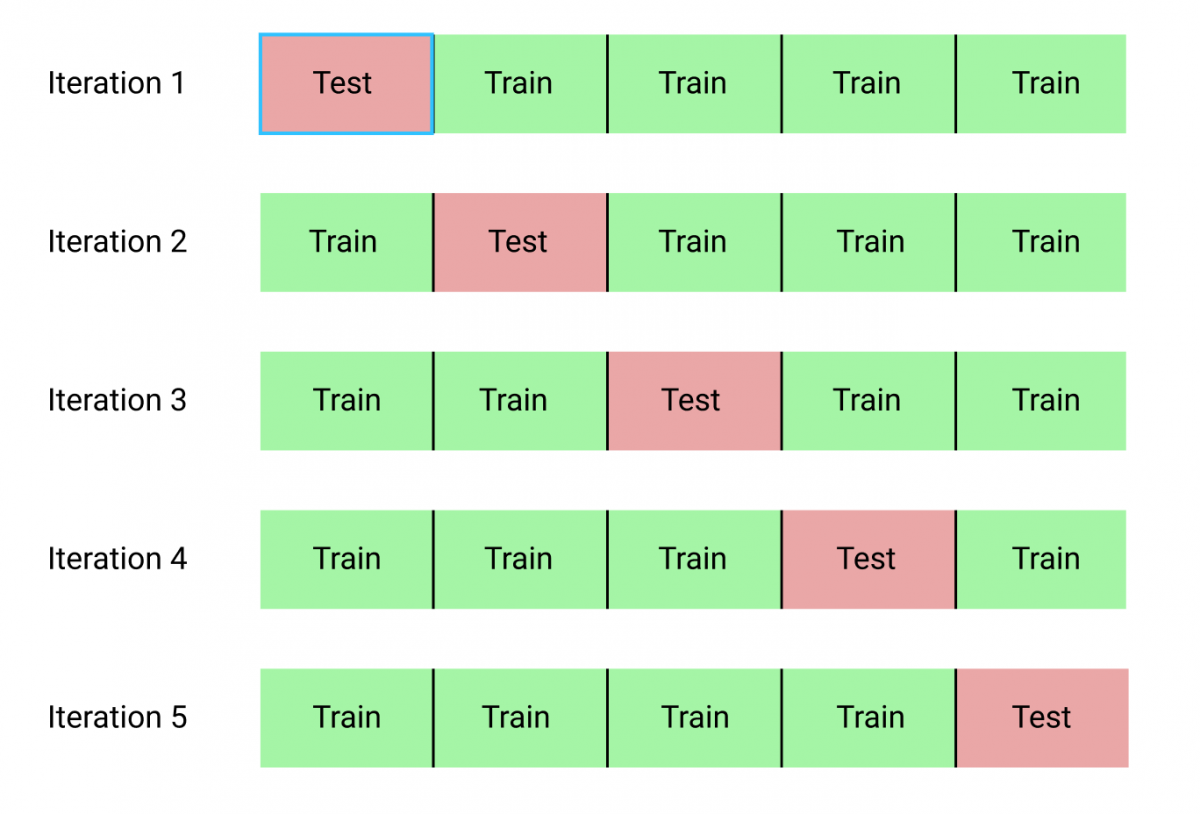

Небольшое видео объяснение о том, как работает кросс-валидация, можно посмотреть по [ссылке](https://www.youtube.com/watch?v=fSytzGwwBVw)

**Задание 2.1** (тест, 10 баллов) В модуле cross\_val.py реализуйте функции

* $kfold\_split$, которая реализует генерацию индексов обучающей и валидационной выборок для кросс-валидации
* $knn\_cv\_score$, которая реализует кросс-валидацию для $KNN-$модели

Далее будем решать задачу предсказания цены дома в Калифорнии с помощью $KNN$-регрессии. В качестве метрики качества будем использовать $R^2-$score.

$R^2(y\_true, y\_predict) = 1 - \frac{\sum_{i=1}^{n} (y\_true_i - y\_predict_i)^2}{\sum_{i=1}^{n} (y\_true_i - E(y\_true_i))^2}$ 

In [308]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [309]:
X, y = fetch_california_housing(return_X_y=True)

**Задание 2.2** (кросс, 1 балл) Разбейте выборку на обучающую (75%) и тестовую (25%) с помощью функции $train\_test\_split$. Используйте параметр **random_state=42!** Не забудьте перемешать данные перед разбиением (см. параметры функции). Запустите кросс-валидацию на 3 фолдах с помощью реализованных вами функций $kfold\_split$, $knn\_cv\_score$. В качестве метрики используйте $r2\_score$. Параметры для перебора описаны ниже

In [310]:
from sklearn.metrics import r2_score

parameters = {
    'n_neighbors': [1, 5, 10],
    'metrics': ['euclidean', 'cosine'],
    'weights': ['uniform', 'distance'],
    'normalizers': [(None, 'None'), (MinMaxScaler(), 'MinMax'), (StandardScaler(), 'Standard')]
}
score_function = r2_score

**После того, как вы локально реализовали и протестировали модуль cross_val.py, загрузите его в сессионное хранилище: нажмите знак папки слева, затем знак загрузки**

In [311]:
from cross_val import kfold_split, knn_cv_score

In [312]:
#ваш код
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# по умолчанию размер тесторвой выборки - 25%, размер обучающей - 75%, shuffle=True

In [313]:
d = knn_cv_score(X_train, y_train, parameters, score_function, kfold_split(X_train.shape[0], 3), neighbors.KNeighborsRegressor)

**Задание 2.3** (кросс, 3 балла) Какой наибольший $r2\_score$ удалось достичь на валидации? Какие закономерности вы видите? Обучите модель с наилучшими параметрами на всей обучающей выборке, измерьте $r2\_score$ на тестовой выборке.

Выведите результаты кросс-валидации

In [314]:
#ваш код
# print(d) # - печатает в строку, очень ненаглядно
d

{('None', 1, 'euclidean', 'uniform'): -0.2698362539419594,
 ('None', 1, 'euclidean', 'distance'): -0.2698362539419594,
 ('None', 1, 'cosine', 'uniform'): 0.10527040776150857,
 ('None', 1, 'cosine', 'distance'): 0.1052704077615086,
 ('MinMax', 1, 'euclidean', 'uniform'): 0.5329368736058075,
 ('MinMax', 1, 'euclidean', 'distance'): 0.5329368736058075,
 ('MinMax', 1, 'cosine', 'uniform'): 0.4590323476108448,
 ('MinMax', 1, 'cosine', 'distance'): 0.4590323476108448,
 ('Standard', 1, 'euclidean', 'uniform'): 0.5139255367340351,
 ('Standard', 1, 'euclidean', 'distance'): 0.5139255367340351,
 ('Standard', 1, 'cosine', 'uniform'): 0.47958515234726945,
 ('Standard', 1, 'cosine', 'distance'): 0.47958515234726945,
 ('None', 5, 'euclidean', 'uniform'): 0.0977684191856583,
 ('None', 5, 'euclidean', 'distance'): 0.1199731657678866,
 ('None', 5, 'cosine', 'uniform'): 0.37805502479959713,
 ('None', 5, 'cosine', 'distance'): 0.3955985736693515,
 ('MinMax', 5, 'euclidean', 'uniform'): 0.6915621333110309

In [315]:
m = max(d, key=d.get)
print(m)
print(d[m])

('MinMax', 10, 'euclidean', 'distance')
0.7035316821435433


Кросс-валидация дает наилучший результат при использовании параметров **('MinMax', 10, 'euclidean', 'distance')**. Результат, при таких параметрах получается равным **0.7035316821435433**.

1. При использовании разных параметров в кросс-валидации лучшая точность достигается при использовании нормализации. При использовании MinMaxScaler точность вырастает. 
2. Точность вырастает при использовании большего числа соседей. 
3. Косинусная метрика дает нам большую точность по сравнению с евклидовой метрикой если не использовать нормализацию. С нормализацией евклидова метрика чуть лучше, чем косинусная.
4. Метод с весами дает большую точность, чем метод, в котором все объекты весят одинаково.

Обучите модель с лучшими по валидации параметрами на обучающей выборке

In [316]:
scal = MinMaxScaler()
scal.fit(X_train)
X_train_n = scal.transform(X_train)
X_test_n = scal.transform(X_test)
KNN = neighbors.KNeighborsRegressor(n_neighbors=m[1], weights=m[3], metric=m[2])
KNN.fit(X_train_n, y_train)
pred = KNN.predict(X_test_n)
d1 = r2_score(y_test, pred)
print(d1)

0.7117082182374788


Полученная точность - **0.7117082182374788**

Наибольшее значение $R^2 score$, которого удалось достичь на кросс валидации равняется **0.7035316821435433**, оно достигается при параметрах **('MinMax', 10, 'euclidean', 'distance')**. При обучении модели на всей выборке и проверке на тестовых данных, полученных при использовании функции train_test_split достигается качество **0.7117082182374788**. Качество стало выше.

# Часть 3. Работа с текстовыми данными

Далее будем решать задачу классификации новостного текста к одному из 20 классов, каждый класс соответствует определенной новостной тематике. В качестве метрики качества будем использовать $accuracy\_score$. Accuracy - это доля верно классифицированных объектов, среди всех объектов выборки.

In [317]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [318]:
X_train, y_train = fetch_20newsgroups(subset='train', return_X_y=True, random_state=42)
X_test, y_test = fetch_20newsgroups(subset='test', return_X_y=True, random_state=42)

In [319]:
print(X_train[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [320]:
X_train = np.array(X_train, dtype=object)

In [321]:
X_test = np.array(X_test, dtype=object)

In [322]:
y_train = np.array(y_train)
y_test = np.array(y_test)

Как мы видим, объектами обучающей выборки являются тексты. Сырые текстовые данные не могут служить обучающими примерами для алгоритма $KNN$. Перед использованием $KNN$ текстовые данные переменной длины необходимо отобразить в метрическое пространство фиксированной размерности.

Работа с текстовыми данными проходит в несколько этапов.

* **Токенизация.** Текстовая строка делится на токены. Как правило, в качестве токенов выступают отдельные слова и знаки препинания.

* **Нормализация.** Приведение к нижнему регистру, удаление стоп-слов, удаление пунктуации, удаление редких и частотных слов и т.д.

* **Векторизация.** Фиксируется словарь токенов $V$ по **обучающей** выборке. Текст представлется в виде вектора длиной $|V|$, где каждый признак есть функция от частоты встречаемости токена в тексте и в обучающей выборке.

В данном задании будет использовано два вида векторизации. Первый, $CountVectorizer$, сопоставляет каждому токену частоту встречаемости этого токена в тексте документа. Второй, $TfidfVectorizer$, сопоставляет каждому токену частоту встречаемости этого токена в тексте документа умноженную на величину обратно пропорциональную частоте встречаемости токена во всех документах **обучающей** выборки. Подробне про $tf-idf$ можно прочитать [здесь](https://ru.wikipedia.org/wiki/TF-IDF).

В sklearn все векторизаторы автоматически токенизируют текст и приводят его к нижнему регистру. Параметры $max\_df$ и $min\_df$ позволяют убрать из словаря наиболее частые и наиболее редкие токены. Параметр $stop\_words$ позволяет убрать из словаря стоп-слова (малоинформативные слова для данного языка, например, союзы).

In [323]:
count_vec = CountVectorizer(max_df=0.8, min_df=10, stop_words='english')
tf_idf = TfidfVectorizer(max_df=0.8, min_df=10, stop_words='english')

**Задание 3.1** (кросс, 2 балла) Найдите оптимальные параметры обучения модели. Осуществлять перебор параметров следует по заданной ниже сетке. Используйте реализованные вами функции $kfold\_split$, $knn\_cv\_score$. В качестве метрики используйте $accuracy\_score$. 3х фолдов для кросс-валидации будет достаточно.

In [324]:
from sklearn.metrics import accuracy_score

parameters = {
    'n_neighbors': [i for i in range(1, 11)],
    'metrics': ['euclidean', 'cosine'],
    'weights': ['uniform', 'distance'],
    'normalizers': [(count_vec, 'CountVectorizer'), (tf_idf, 'TfidfVectorizer')]
}

Если вы все сделаете правильно, то запущенная вами кросс-валидация будет работать примерно 7 минут. Дождитесь ее завершения, не закрывайте и не перезагружайте этот colab ноутбук.

In [325]:
score_function = accuracy_score

In [326]:
#ваш код
d = knn_cv_score(X_train, y_train, parameters, score_function, kfold_split(X_train.shape[0], 3), neighbors.KNeighborsClassifier)

In [328]:
# print(d) # - печатает в строку, очень ненаглядно
d

{('CountVectorizer', 1, 'euclidean', 'uniform'): 0.5788394464311978,
 ('CountVectorizer', 1, 'euclidean', 'distance'): 0.5788394464311978,
 ('CountVectorizer', 1, 'cosine', 'uniform'): 0.7664838188107246,
 ('CountVectorizer', 1, 'cosine', 'distance'): 0.7664838188107246,
 ('TfidfVectorizer', 1, 'euclidean', 'uniform'): 0.7820399236644299,
 ('TfidfVectorizer', 1, 'euclidean', 'distance'): 0.7820399236644299,
 ('TfidfVectorizer', 1, 'cosine', 'uniform'): 0.7820399236644299,
 ('TfidfVectorizer', 1, 'cosine', 'distance'): 0.7820399236644299,
 ('CountVectorizer', 2, 'euclidean', 'uniform'): 0.47719622945252316,
 ('CountVectorizer', 2, 'euclidean', 'distance'): 0.5791930688322138,
 ('CountVectorizer', 2, 'cosine', 'uniform'): 0.7119503468217899,
 ('CountVectorizer', 2, 'cosine', 'distance'): 0.7664838188107246,
 ('TfidfVectorizer', 2, 'euclidean', 'uniform'): 0.731395102941379,
 ('TfidfVectorizer', 2, 'euclidean', 'distance'): 0.7820399236644299,
 ('TfidfVectorizer', 2, 'cosine', 'uniform'):

In [329]:
m = max(d, key=d.get)
print(m)
print(d[m])

('TfidfVectorizer', 4, 'cosine', 'distance')
0.7822165473911665


Параметры **('TfidfVectorizer', 4, 'cosine', 'distance')** дают наилучшую точность. Полученный результат **0.7822165473911665**

**Задание 3.2** (кросс, 2 балла) Какой метод предобработки данных в среднем дает наилучший результат? Почему?

In [330]:
#ваш код
tfidf = 0
ii = 0
for i in d:
  if (i[0] == 'TfidfVectorizer'):
    tfidf += d[i]
    ii += 1
tfidf /= ii

cou = 0
ii = 0
for i in d:
  if (i[0] == 'CountVectorizer'):
    cou += d[i]
    ii += 1
cou /= ii

print('TfidfVectozer:', tfidf)
print('CountVectorizer:', cou)

TfidfVectozer: 0.7605066798545091
CountVectorizer: 0.6222374409914588


При сравнении средних значений, посчитанных для методов предобработки $TfidfVectorizer$ и $CountVectorizer$, мы получили следующие результаты:

$TfidfVectozer:$ **0.7605066798545091**

$CountVectorizer:$ **0.6222374409914588**

Таким образом, метод предобработки $TfidfVectorizer$ в среднем дает лучший результат в данной задаче.

$TfidfVectorizer$ дает в среднем лучший результат, потому что если слово встречается в каком-то документе часто, при этом встречается редко во всех остальных документах — это слово имеет большую значимость для того самого документа и получает больший вес, тем самым выявляются важные слова. Веса, полученные таким образом, лучше характеризуют документ, чем просто счетчики $(CountVectorizer)$, поэтому по таким признакам можно точнее классифицировать.

**Задание 3.3** (кросс, 2 балла) Какая метрика близости позволяет в среднем достичь наилучшее качество? Почему?

In [331]:
#ваш код
cos = 0
ii = 0
for i in d:
  if (i[2] == 'cosine'):
    cos += d[i]
    ii += 1
cos /= ii

euc = 0
ii = 0
for i in d:
  if (i[2] == 'euclidean'):
    euc += d[i]
    ii += 1
euc /= ii

print('cosine:', cos)
print('euclidean:', euc)

cosine: 0.7508174905107807
euclidean: 0.6319266303351873


При сравнении средних значений, посчитанных для косинусной и евклидовой метрики, мы получили следующие результаты:

$cosine:$ **0.7508174905107807**

$euclidean:$ **0.6319266303351873**

Таким образом, косинусная метрика дает лучший результат в данной задаче.

Косинусная метрика больше подходит при работе с текстами, потому что на ее результат не влияет длина текста, а на евклидову метрику длина текста может влиять. Косинусная метрика учитывает только угол между векторами, в отличие от евклидовой, которая учитывает и их длину.

**Задание 3.4** (кросс, 2 балла) Начертите график зависимости метрики качества от числа соседей. Метрику следует усреднить по всем параматрам, кроме числа соседей. Сделайте выводы о наблюдаемых зависимостях (возможно будет полезным ознакомиться с названиями классов)

In [332]:
#ваш код
res = np.zeros(10)
for i in range(res.shape[0]):
  ii = 0
  for j in d:
    if (j[1] == i+1):
      res[i] += d[j]
      ii += 1
  res[i] /= ii

print(res)
print('\nЧисло соседей, при котором в среднем достигается наилучший результат -', np.where(res.max() == res)[0][0] + 1)

[0.72735078 0.69521169 0.69364255 0.69358744 0.69085844 0.68794149
 0.68501366 0.68324589 0.68019658 0.67667209]

Число соседей, при котором в среднем достигается наилучший результат - 1


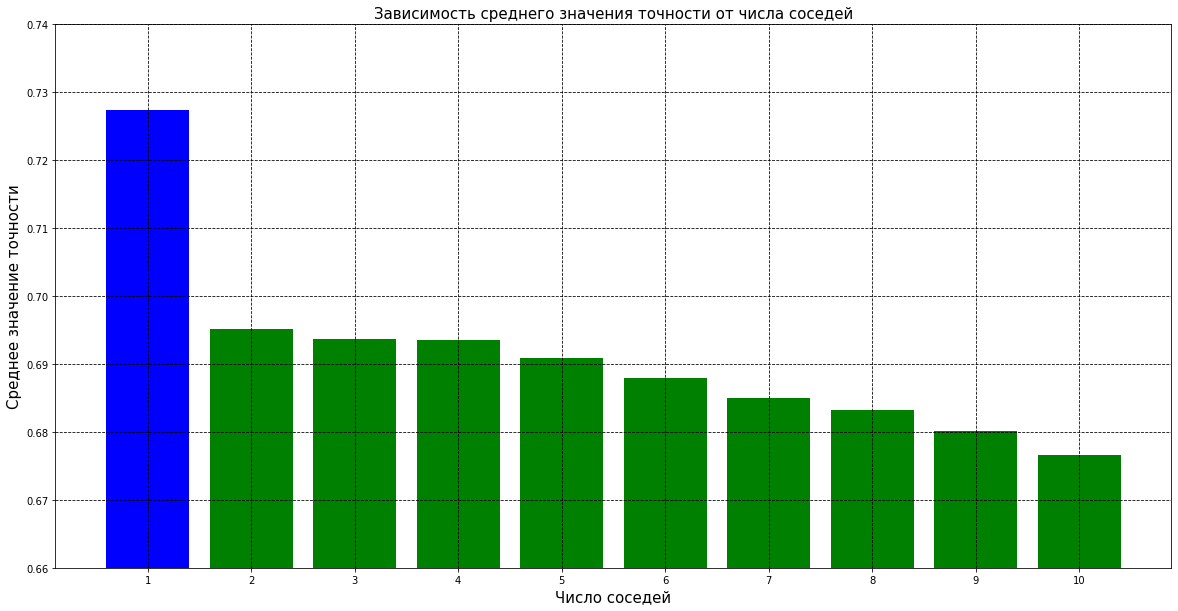

In [333]:
fig = plt.figure(figsize=(20, 10))

col = []
for i in res:
    if (i == res.max()):
      col.append('b')
    else:
      col.append('g')

plt.bar(np.arange(1, 11), res, color=col)
plt.title('Зависимость среднего значения точности от числа соседей', fontsize=15)
plt.xlabel('Число соседей', fontsize=15)
plt.ylabel('Среднее значение точности', fontsize=15)
plt.xticks(np.arange(1, 11))
plt.ylim((0.66, 0.74))
plt.grid(color='black', linestyle='--')

plt.show()

In [334]:
print(list(fetch_20newsgroups().target_names))

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


В среднем качество с ростом числа соседей ухудшается. Это связано с тем, что многие классы похожи друг на друга (имеют одинаковые теги перед первой точкой). Тогда при поиске большого числа соседей алгоритм находит много объектов из классов, похожих на искомый и дает неверный ответ. 

Наилучший результат в среднем достигается при поиске по **одному** соседу.

**Задание 3.5** (кросс, 3 балла) Оцените точность вашей лучшей модели на тестовой части датасета. Отличается ли оно от качества, полученного на кросс-валидации? Почему?

In [335]:
# вывод лучших параметров
print(m)
print(d[m])

('TfidfVectorizer', 4, 'cosine', 'distance')
0.7822165473911665


In [336]:
#ваш код

tf_idf.fit(X_train)
X_train_n = tf_idf.transform(X_train)
X_test_n = tf_idf.transform(X_test)
KNN = neighbors.KNeighborsClassifier(n_neighbors=m[1], weights=m[3], metric=m[2])
KNN.fit(X_train_n, y_train)
pred = KNN.predict(X_test_n)
d1 = accuracy_score(y_test, pred)
print(d1)

0.6688794476898566


Полученная точность - **0.6688794476898566**

Полученная точность ниже точности, полученной на кросс-валидации. Это происходит из-за дисбаланса классов. Во время кросс валидации мы по разному разбивали обучающую выборку, что позволило оценить результат на более сбалансированном по количеству объектов класса наборе данных. Обучающая выборка целиком может быть уже не такой слабансированной, что влияет на точность.
